вариант 21

ПЗ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel('data4/Семинар 4.xlsx', sheet_name='21', names=['num', 'x', 'y']).drop('num', axis=1)
df

,x,y
0,29.869986,7.104316
1,-0.246127,-1.668001
2,-16.339419,-6.560642
3,-31.674738,-7.375230
4,-24.531551,-7.653520
...,...,...
995,-29.086540,-6.919875
996,-41.537429,-10.842517
997,-47.281160,-13.763856
998,61.742088,16.178129


In [3]:
df['x'] = df['x'].fillna(df['y'].mean())
df['y'] = df['y'].interpolate()

In [4]:
data_arr = df.to_numpy()
q_025 = np.quantile(data_arr[:,1],0.25)
q_075 = np.quantile(data_arr[:,1],0.75)
iqd = q_075-q_025
upper_threshold = q_075+1.5*iqd
lower_threshold = q_025-1.5*iqd

df_new_y = df.loc[(df['y'] <= upper_threshold) & (df['y'] >= lower_threshold)]

In [5]:
data_arr = df_new_y.to_numpy()
q_025 = np.quantile(data_arr[:, 0], 0.25)
q_075 = np.quantile(data_arr[:, 0], 0.75)
iqd = q_075-q_025
upper_threshold = q_075+1.5*iqd
lower_threshold = q_025-1.5*iqd

df_new_y.loc[(df_new_y['x'] < lower_threshold) | (df_new_y['x'] > upper_threshold)] = df_new_y['x'].mean()

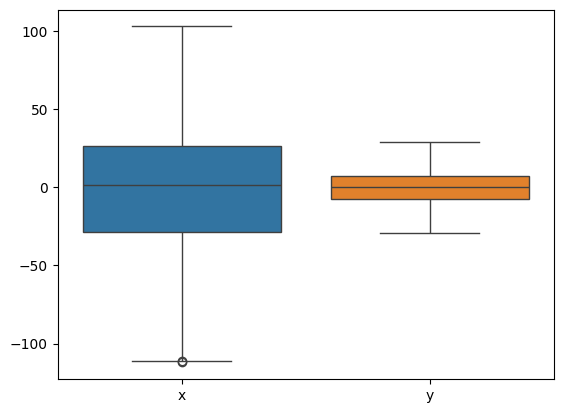

In [6]:
sns.boxplot(df_new_y)

data_sample = df_new_y.sample(9)

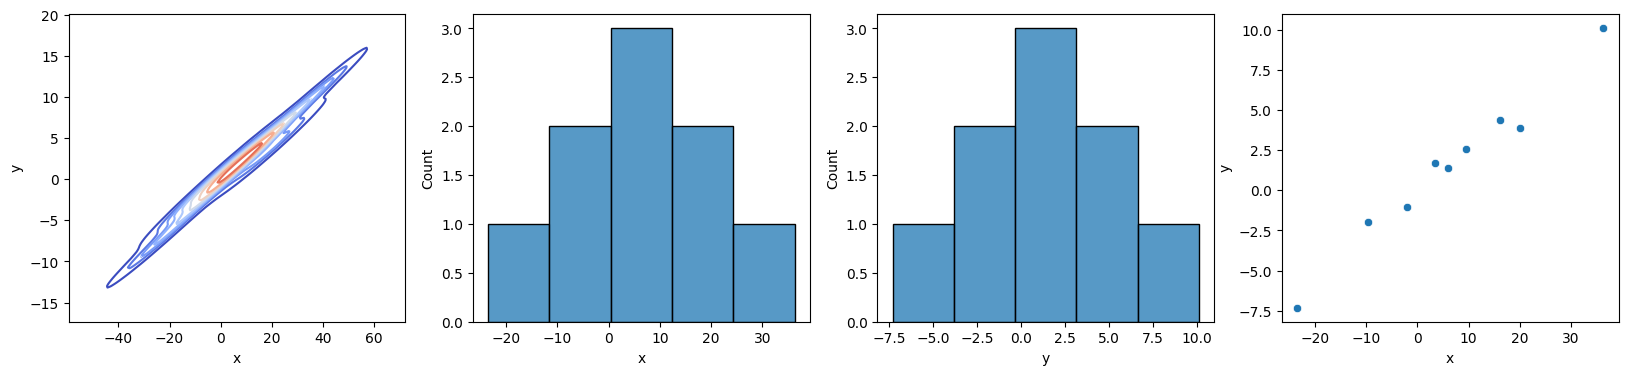

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
p1 = sns.kdeplot(x=data_sample['x'], y=data_sample['y'], cmap="coolwarm", ax = axes[0])
p2 = sns.histplot(x=data_sample['x'], ax = axes[1])
p3 = sns.histplot(x=data_sample['y'], ax = axes[2])
p4 = sns.scatterplot(x=data_sample['x'], y=data_sample['y'], ax = axes[3])

plt.show()

ЛАБА

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_excel('data4/Лабораторная работа 4.xlsx', sheet_name='21', names=['num','class', 'x1', 'x2', 'x3', 'x4']).drop('num', axis=1)
df

,class,x1,x2,x3,x4
0,2,7.477363,5.869362,3.986721,1.942083
1,2,-2.432976,1.298125,0.432258,0.476251
2,1,-0.697250,1.315023,1.224133,1.183016
3,2,2.875716,6.981826,0.750320,1.149548
4,1,2.844542,1.407916,1.096870,1.421860
...,...,...,...,...,...
195,2,0.852120,3.135418,-0.464462,0.294688
196,1,3.031264,2.487835,1.004889,1.844979
197,2,3.443955,3.760132,-0.255606,0.789110
198,2,2.675091,2.152192,-1.025384,-0.335749


эмпирические функции распределения столбцов

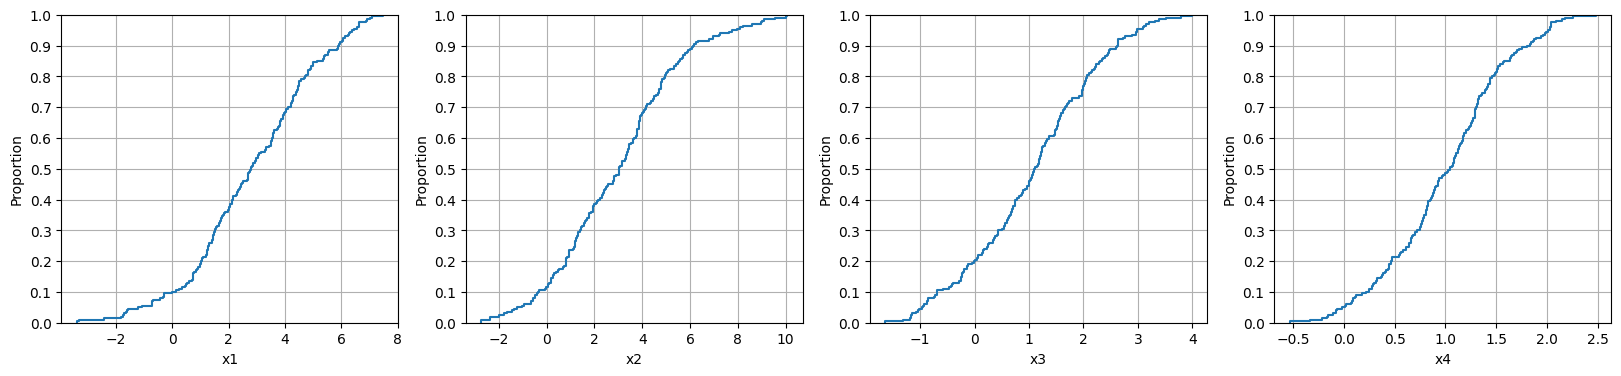

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
for i in range(1, 5): 
    x = f'x{i}'
    emp_distr = df[x].copy()
    ax = sns.ecdfplot(emp_distr, ax = axes[i-1])
    ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
    ax.grid()

ящики с усами и скрипичные диаграммы

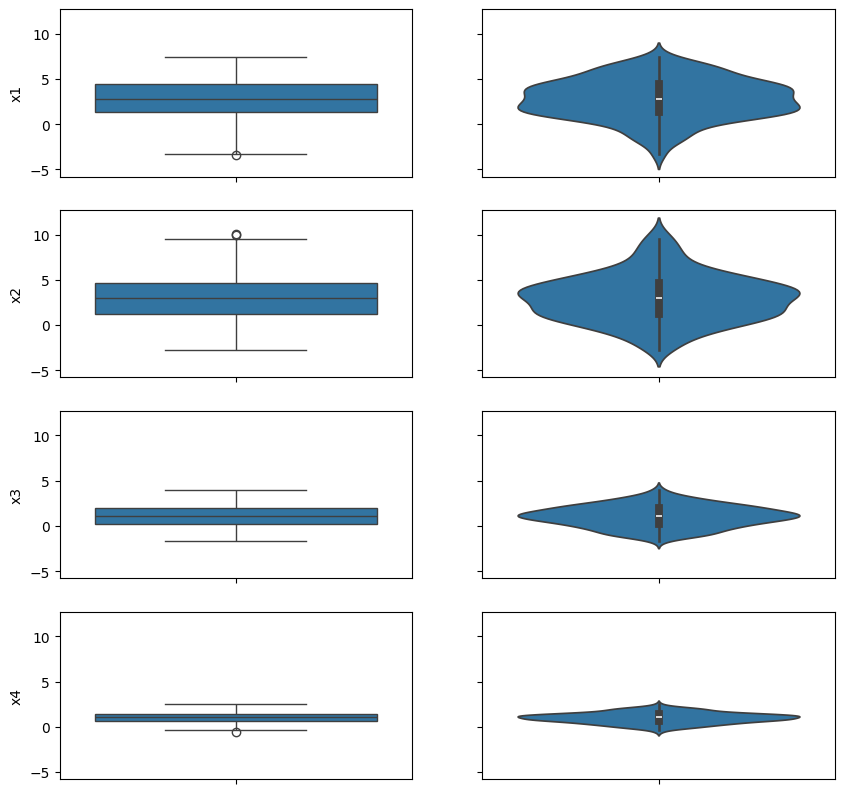

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharey=True)
for i in range(1, 5):
    plt.subplots_adjust()
    sns.boxplot(y = f'x{i}', data = df, ax = axes[i-1][0])
    sns.violinplot(y = f'x{i}', data = df, ax = axes[i-1][1])

гистограммы

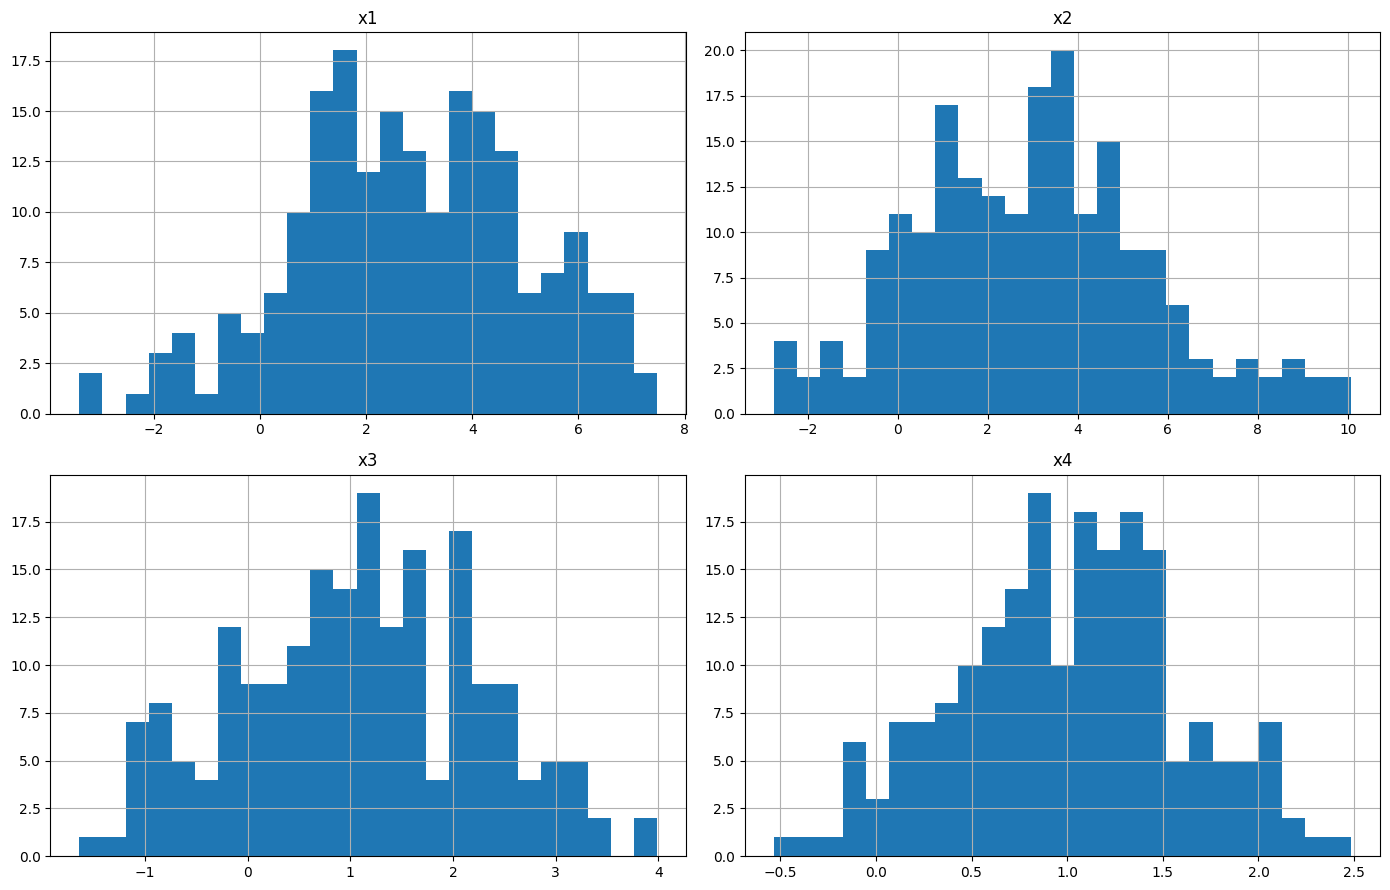

In [12]:
X = df.drop('class', axis=1, inplace=False)
_ = X.iloc[:,0:].hist(figsize=(14, 9), bins=25)
plt.tight_layout()

диаграммы рассеяния с указанием класса

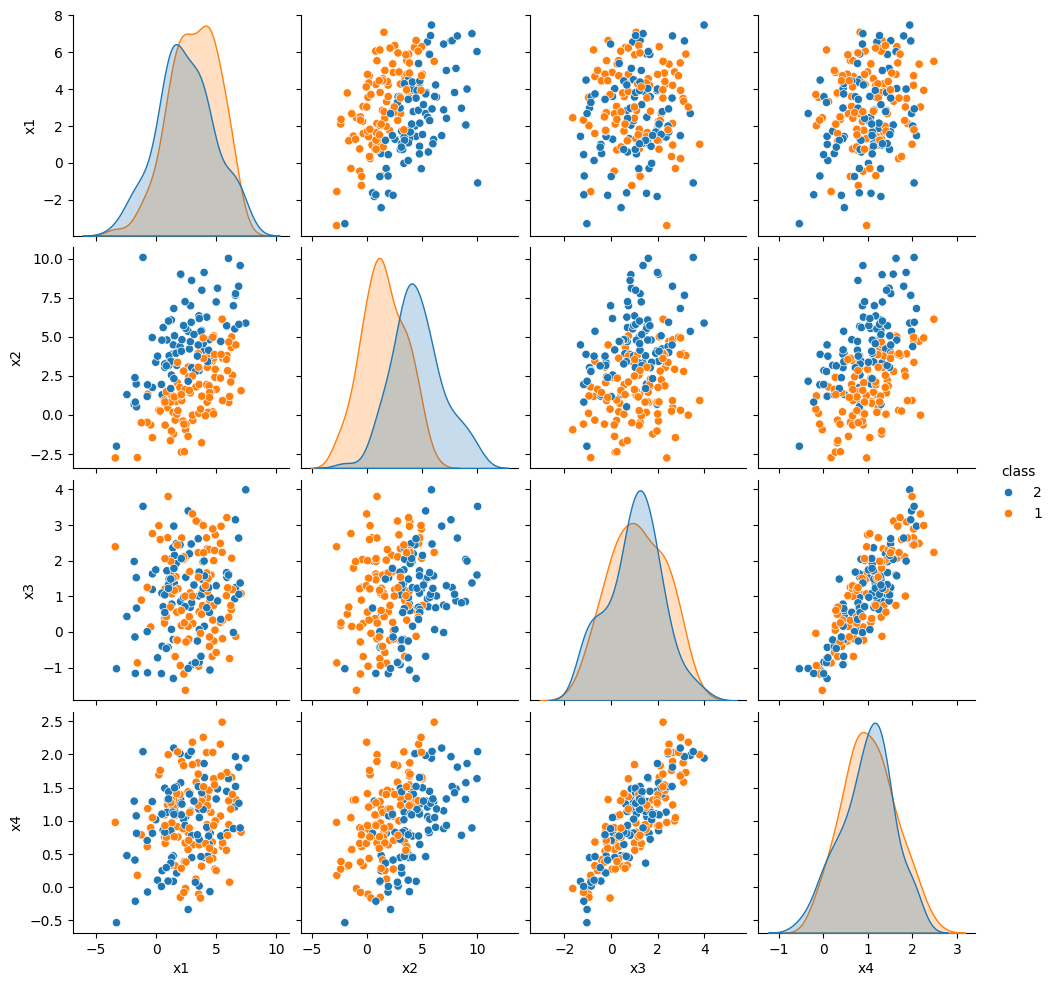

In [13]:
df['class'] = df['class'].astype(str)
sns.pairplot(df, vars=X.columns, diag_kind = 'kde', diag_kws=dict(fill=True), hue='class')

графики двумерных плотностей распределения

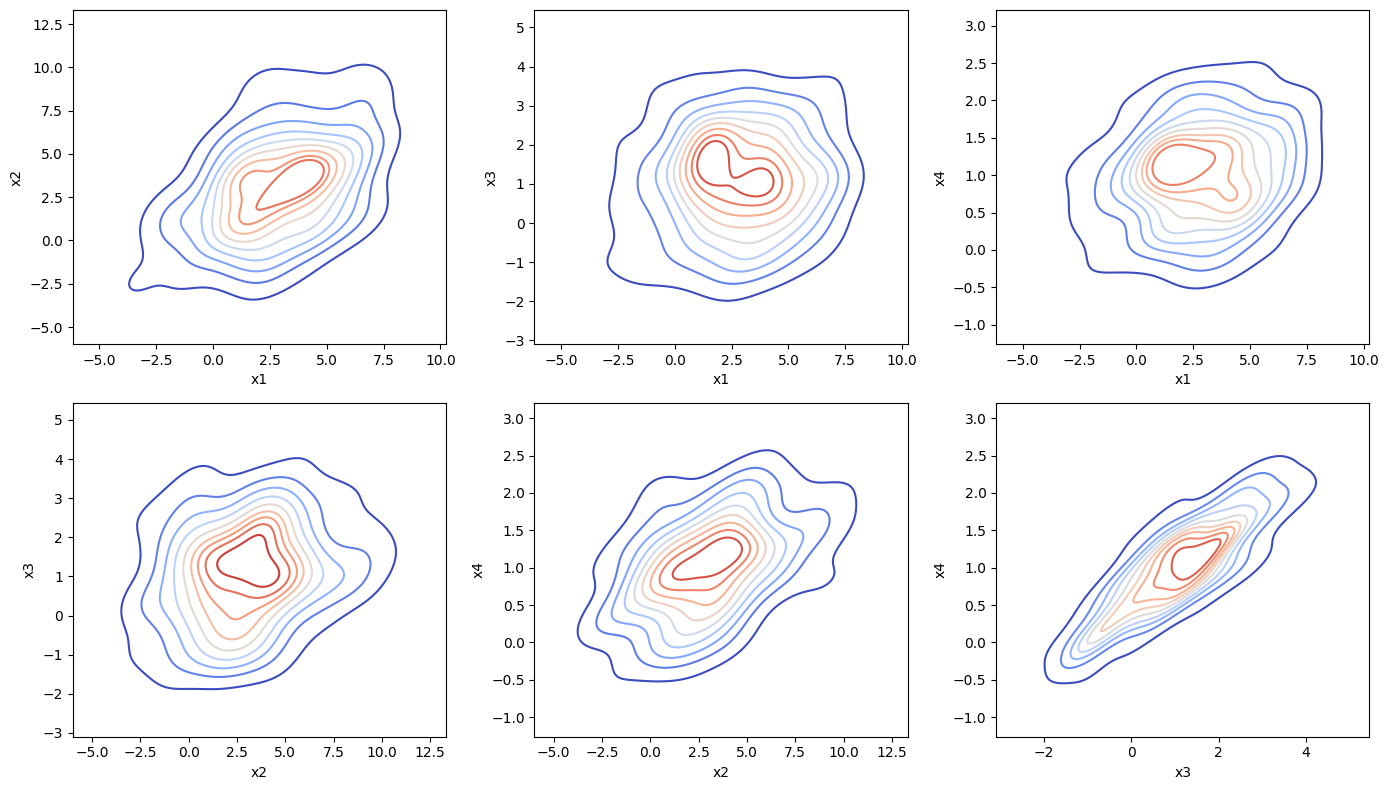

In [14]:
pairs = [('x1', 'x2'), ('x1', 'x3'), ('x1', 'x4'), ('x2', 'x3'), ('x2', 'x4'), ('x3', 'x4')]
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8))

for ax, (x_col, y_col) in zip(axes.flat, pairs):
    sns.kdeplot(x = df[x_col], y = df[y_col], cmap = "coolwarm", ax = ax)
plt.tight_layout()

комбинированные диаграммы по стандартизованным данным

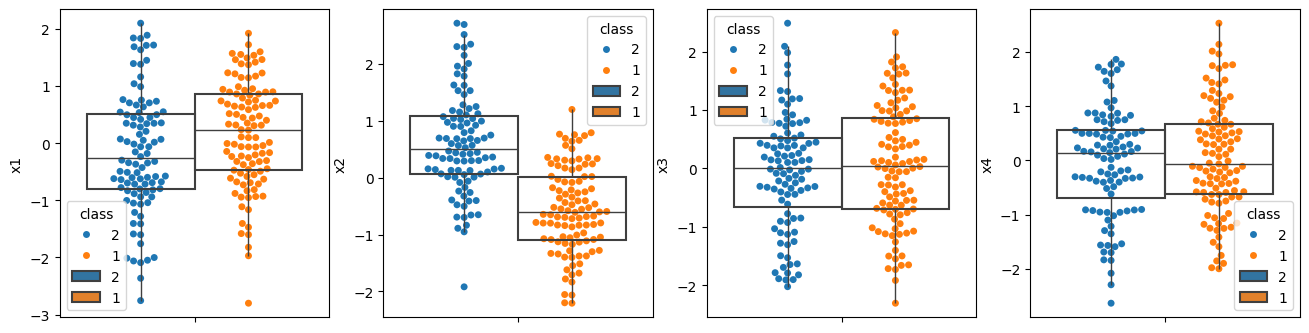

In [15]:
sc = StandardScaler()
sc.fit(X.astype('float64'))
Xsc = sc.transform(X.astype('float64'))
Xsc = pd.DataFrame(Xsc, index=X.index, columns=X.columns)
Xsc['class'] = df['class']

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    g = sns.swarmplot(y = f'x{i+1}', hue = 'class', data = Xsc, dodge = True, ax = axes[i])
    gg = sns.boxplot(
      y = f'x{i+1}',
      hue = 'class',
      data = Xsc,
      showcaps = False,
      boxprops = {'facecolor':'None', 'linewidth':1.5, 'zorder':10},
      showfliers = False, whiskerprops = {'linewidth':1., 'zorder':10},
      ax = axes[i],
      zorder = 10
    )